## Program for Exercise 3 - Fuzzy Logic
This program is made to replicate the fuzzy expert system that is described chapter 4.7
in the textbook “Artificial Intelligence: A Guide to Intelligent Systems”.
The program implements both the Mamdani and the Sugeno method for comparison.


In [2]:
# Import the packages used in the project
import simpful as fs  # changed line 149 to show(block=False) (in simpful.py)
from matplotlib import pylab as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

The following section is used to define two function that is used to make the 3d surface plots.

In [3]:
def combined_surface_plot(sys, plot_title, ling_vars, domain=None, divisions=20, sugeno=False):
    """ Function to plot 2 surface plots side by side
    :param sys: The fuzzy system to infer
    :param plot_title: The title given to the plot
    :param ling_vars: Array containing all the names of the linguistic variables (need to be 4 variables)
    :param domain: Array to limit the plot to a given domain
    :param divisions: Number of devisons to calculate in the plot
    :param sugeno: Set to true to use Sugeno inference
    """
    # Split the ling vars for the different plots
    # plot 1 contains the 1st and 2nd input variable, and the last (4th) as the output
    ling_var_plot1 = ling_vars[:2]
    ling_var_plot1.append(ling_vars[-1])
    # plot 2 contains the 1st and 3rd input variable, and the last (4th) as the output
    ling_var_plot2 = ling_vars[:1]
    ling_var_plot2.append(ling_vars[2])
    ling_var_plot2.append(ling_vars[3])

    if domain is not None:
        # Split the domain in the same way as the ling_vars
        domain_plot1 = domain[:2]
        domain_plot1.append(domain[-1])
        domain_plot2 = domain[:1]
        domain_plot2.append(domain[2])
        domain_plot2.append(domain[3])
    else:
        domain_plot1 = None
        domain_plot2 = None
    for var in ling_vars[:-1]:
        # Set all the variables (inputs) to the middle of the domain
        sys.set_variable(var, 0.5)

    # Calculate the x, y and z values for the first plot
    plot1_xs, plot1_ys, plot1_zs = surface_plot_3d(sys, ling_var_plot1, domain_plot1, divisions,
                                                   sugeno, computation_only=True)

    for var in ling_vars[:-1]:
        # Set all the variables (inputs) to the middle of the domain
        sys.set_variable(var, 0.5)

    # Calculate the x, y and z values for the first plot
    plot2_xs, plot2_ys, plot2_zs = surface_plot_3d(sys, ling_var_plot2, domain_plot2, divisions,
                                                   sugeno, computation_only=True)
    # Make the plot
    fig = plt.figure(figsize=(10, 6))
    fig.suptitle(plot_title, fontsize=20)
    # Add the first subplot
    ax = fig.add_subplot(121, projection='3d')
    xx, yy = plt.meshgrid(plot1_xs, plot1_ys)
    # plot the first plot
    ax.plot_trisurf(plot1_xs, plot1_ys, plot1_zs, vmin=domain_plot1[2][0], vmax=domain_plot1[2][1], cmap='gnuplot2')
    # Set the labels to the names of the variables, and limit the z-axis
    ax.set_xlabel(ling_var_plot1[0])
    ax.set_ylabel(ling_var_plot1[1])
    ax.set_zlabel(ling_var_plot1[2])
    ax.set_zlim(domain_plot1[2][0], domain_plot1[2][1])

    # Make the second subplot
    ax2 = fig.add_subplot(122, projection='3d')
    xx, yy = plt.meshgrid(plot2_xs, plot2_ys)
    # plot the second plot
    ax2.plot_trisurf(plot2_xs, plot2_ys, plot2_zs, vmin=domain_plot1[2][0], vmax=domain_plot1[2][1], cmap='gnuplot2')
    # Set the labels to the names of the variables, and limit the z-axis
    ax2.set_xlabel(ling_var_plot2[0])
    ax2.set_ylabel(ling_var_plot2[1])
    ax2.set_zlabel(ling_var_plot2[2])
    ax2.set_zlim(domain_plot2[2][0], domain_plot2[2][1])

    plt.tight_layout()
    # Show the plot without blocking the program (Only need when not using jupyter notebook)
    plt.show(block=False)


def surface_plot_3d(sys, ling_vars: list, domain=None, divisions=20, sugeno=False, computation_only=False):
    """
    Function to generate the inference datapoint in ranges, it can either make the surface plot
    or return the data points
    :param sys: The fuzzy system to infer
    :param ling_vars: Array containing all the names of the linguistic variables (2 inputs and 1 output)
    :param domain: Array to limit the plot to a given domain
    :param divisions: Number of devisons to calculate in the plot
    :param sugeno: Set to true to use Sugeno inference
    :param computation_only: Set to true to return the data points instead of plotting
    :return: xs, ys, zs: (only if computation_only is TRUE), the data points as numpy arrays
    """
    #
    if domain is None:
        domain = [[0, 1], [0, 1], [0, 1]]
    xs = []
    ys = []
    zs = []
    DIVs = divisions
    # Calculate all the data points
    for x in np.linspace(domain[0][0], domain[0][1], DIVs):
        for y in np.linspace(domain[1][0], domain[1][1], DIVs):
            # Set the variables
            sys.set_variable(ling_vars[0], x)
            sys.set_variable(ling_vars[1], y)
            # Infer the system
            if sugeno:
                # Use sugeno if enabled
                z = sys.Sugeno_inference([ling_vars[2]])
            else:
                z = sys.Mamdani_inference([ling_vars[2]])
            #Add the data to the arrays
            xs.append(x)
            ys.append(y)
            zs.append(z[list(z.keys())[0]])

        # Print progress bar
        percent = ("{0:." + str(1) + "f}").format(100 * (x / float(domain[0][1]-domain[0][0])))
        filledLength = int(100 * x // domain[0][1]-domain[0][0])
        bar = '█' * filledLength + '-' * (100 - filledLength)
        print(f'\r{"Calculating subplot"} |{bar}| {percent}% {""}', end="\r")
    print()

    xs = np.array(xs)
    ys = np.array(ys)
    zs = np.array(zs)

    if computation_only:
        # Return the data points and exit the function
        return xs, ys, zs

    # Plotting surface
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xx, yy = plt.meshgrid(xs, ys)

    ax.plot_trisurf(xs, ys, zs, vmin=0, vmax=25, cmap='gnuplot2')
    ax.set_xlabel(ling_vars[0])
    ax.set_ylabel(ling_vars[1])
    ax.set_zlabel(ling_vars[2])
    ax.set_title("Simpful", pad=20)
    ax.set_zlim(domain[2][0], domain[2][1])
    plt.tight_layout()
    plt.show(block=False)


## Defining the linguistic variables for the fuzzy system
Each of the following section defines one linguistic variable and plots it

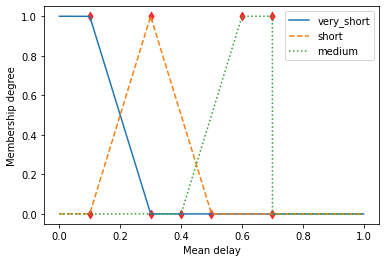

In [4]:
# Define the fuzzy system to be used for Rulebase 1: Mamdani
FS = fs.FuzzySystem(show_banner=False)

# Linguistic variable Mean delay [m]
mean_delay_m1 = fs.FuzzySet(points=[[0.1, 1.],  [0.3, 0.]], term="very_short")
mean_delay_m2 = fs.FuzzySet(points=[[0.1, 0.],  [0.3, 1.], [0.5, 0.]], term="short")
mean_delay_m3 = fs.FuzzySet(points=[[0.4, 0.],  [0.6, 1], [0.7, 1], [0.7, 0.]], term="medium")
mean_delay = fs.LinguisticVariable([mean_delay_m1, mean_delay_m2, mean_delay_m3], universe_of_discourse=[0, 1],
                                   concept="Mean delay")
# Add the linguistic variable to the system
FS.add_linguistic_variable("mean_delay", mean_delay)

# Plot the variable
FS.plot_variable("mean_delay")

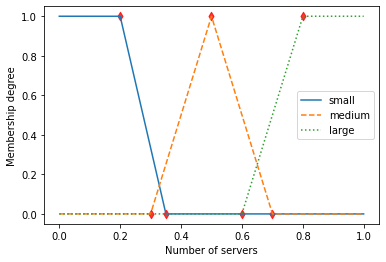

In [5]:
# Number of servers [s]
num_of_servers_s1 = fs.FuzzySet(points=[[0.2, 1.], [0.35, 0.]], term="small")
num_of_servers_s2 = fs.FuzzySet(points=[[0.3, 0.], [0.5, 1.], [0.7, 0]], term="medium")
num_of_servers_s3 = fs.FuzzySet(points=[[0.6, 0.], [0.8, 1.]], term="large")
num_of_servers = fs.LinguisticVariable([num_of_servers_s1, num_of_servers_s2, num_of_servers_s3],
                                       universe_of_discourse=[0, 1], concept="Number of servers")
# Add the linguistic variable to the system
FS.add_linguistic_variable("num_of_servers", num_of_servers)
# Plot the variable
FS.plot_variable("num_of_servers")


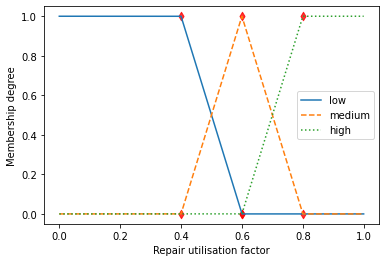

In [6]:
# Repair utilisation factor [rho]
repair_util_rho1 = fs.FuzzySet(points=[[0.4, 1.], [0.6, 0.]], term="low")
repair_util_rho2 = fs.FuzzySet(points=[[0.4, 0.], [0.6, 1.], [0.8, 0]], term="medium")
repair_util_rho3 = fs.FuzzySet(points=[[0.6, 0.], [0.8, 1.]], term="high")
repair_util = fs.LinguisticVariable([repair_util_rho1, repair_util_rho2, repair_util_rho3],
                                    universe_of_discourse=[0, 1], concept="Repair utilisation factor")
# Add the linguistic variable to the system
FS.add_linguistic_variable("repair_util", repair_util)
# Plot the variable
FS.plot_variable("repair_util")

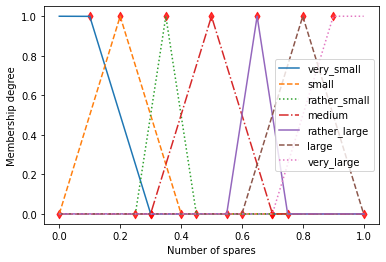

In [7]:
# Number of spares [n]
num_of_spares_n1 = fs.FuzzySet(points=[[0.1, 1.], [0.3, 0.]], term="very_small")
num_of_spares_n2 = fs.FuzzySet(points=[[0., 0.], [0.2, 1.], [0.4, 0.]], term="small")
num_of_spares_n3 = fs.FuzzySet(points=[[0.25, 0.], [0.35, 1.], [0.45, 0.]], term="rather_small")
num_of_spares_n4 = fs.FuzzySet(points=[[0.3, 0.], [0.5, 1.], [0.7, 0.]], term="medium")
num_of_spares_n5 = fs.FuzzySet(points=[[0.55, 0.], [0.65, 1.], [0.75, 0.]], term="rather_large")
num_of_spares_n6 = fs.FuzzySet(points=[[0.6, 0.], [0.8, 1.], [1., 0.]], term="large")
num_of_spares_n7 = fs.FuzzySet(points=[[0.7, 0.], [0.9, 1.]], term="very_large")
num_of_spares = fs.LinguisticVariable([num_of_spares_n1, num_of_spares_n2, num_of_spares_n3, num_of_spares_n4,
                                       num_of_spares_n5, num_of_spares_n6, num_of_spares_n7],
                                      universe_of_discourse=[0, 1], concept="Number of spares")
# Add the linguistic variable to the system
FS.add_linguistic_variable("num_of_spares", num_of_spares)
# Plot the variable
FS.plot_variable("num_of_spares")


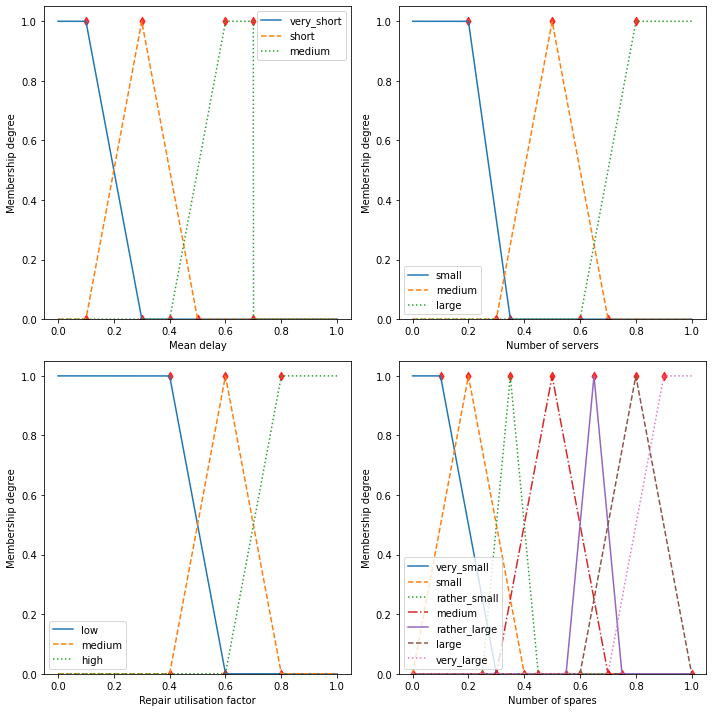

In [8]:
# Plot all the linguistic variables in one plot (used in the hand-in)
FS.produce_figure("expert_ling_var.png", max_figures_per_row=2)

## Rulebase 1
The rules were defined in the textbook.

In [9]:
# Define the rules for the first rulebase
R1 = "IF (repair_util IS low) THEN (num_of_spares IS small)"
R2 = "IF (repair_util IS medium) THEN (num_of_spares IS medium)"
R3 = "IF (repair_util IS high) THEN (num_of_spares IS large)"
R4 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) THEN (num_of_spares IS very_large)"
R5 = "IF (mean_delay IS short) AND (num_of_servers IS small) THEN (num_of_spares IS large)"
R6 = "IF (mean_delay IS medium) AND (num_of_servers IS small) THEN (num_of_spares IS medium)"
R7 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) THEN (num_of_spares IS rather_large)"
R8 = "IF (mean_delay IS short) AND (num_of_servers IS medium) THEN (num_of_spares IS rather_small)"
R9 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) THEN (num_of_spares IS small)"
R10 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) THEN (num_of_spares IS medium)"
R11 = "IF (mean_delay IS short) AND (num_of_servers IS large) THEN (num_of_spares IS small)"
R12 = "IF (mean_delay IS medium) AND (num_of_servers IS large) THEN (num_of_spares IS very_small)"

# Add the rules to the system
FS.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12])


### Make the Sugeno system

 * Detected Sugeno model type
Calculating subplot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated
Calculating subplot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


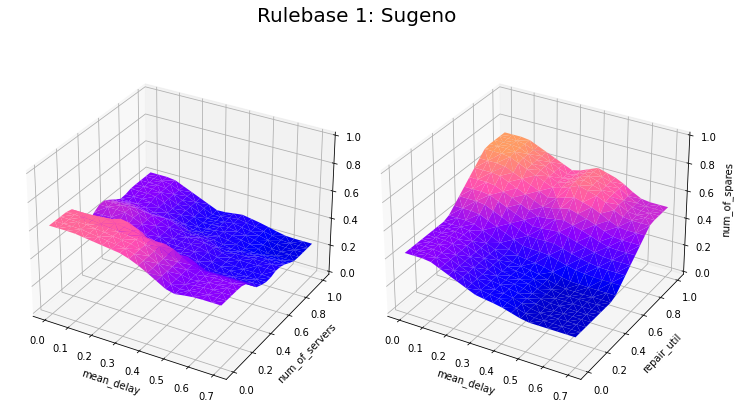

In [11]:
# Add sugeno method
FS_sugeno_rb1 = fs.FuzzySystem(show_banner=False)

FS_sugeno_rb1.add_linguistic_variable("mean_delay", mean_delay)
FS_sugeno_rb1.add_linguistic_variable("num_of_servers", num_of_servers)
FS_sugeno_rb1.add_linguistic_variable("repair_util", repair_util)

FS_sugeno_rb1.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12])

The crisp outputs for the Sugeno system was selected at the centroid of the value function.

In [ ]:
# Define output crisp values
# Ax1 = 0.05 * 0.1 = 0.005
# Ax2 = ((0.3-0.1)/3+0.1) * 0.1 = 1/60
# sum area = 0.05+0.1 = 0.2
# x_bar =(0.01+1/60)/0.2 = 13/120
FS_sugeno_rb1.set_crisp_output_value("very_small", 13/120)
FS_sugeno_rb1.set_crisp_output_value("small", 0.2)
FS_sugeno_rb1.set_crisp_output_value("rather_small", 0.35)
FS_sugeno_rb1.set_crisp_output_value("medium", 0.5)
FS_sugeno_rb1.set_crisp_output_value("rather_large", 0.65)
FS_sugeno_rb1.set_crisp_output_value("large", 0.8)
# Ax1 = 0.95 * 0.1 = 0.095
# Ax2 = (0.9-(0.9-0.7)/3) * 0.1 = 5/6
# sum area = 0.1+0.1 = 0.2
# x_bar =(0.095+5/6)/0.2 = 107/120
FS_sugeno_rb1.set_crisp_output_value("very_large", 107/120)

### Surface plots
The following sections generates the surface plots for the mamdani and sugeno systems using rulebase 1.

In [ ]:
# Plot the response for the rules, surface plot (mamdani)
combined_surface_plot(FS, "Rulebase 1: Mamdani",["mean_delay", "num_of_servers", "repair_util", "num_of_spares"],
                      domain=[[0, 0.7], [0, 1], [0, 1], [0, 1]], divisions=20)


# Plot the response for the rules, surface plot (sugeno)
combined_surface_plot(FS_sugeno_rb1, "Rulebase 1: Sugeno",
                      ["mean_delay", "num_of_servers", "repair_util", "num_of_spares"],
                      domain=[[0, 0.7], [0, 1], [0, 1], [0, 1]], divisions=20, sugeno=True)


## Rulebase 2
The sections for making rule base 2 and the systems using it. The rulebase were defined in the textbook.

In [12]:
# Define the rules for rb2
# mean_delay: very_short, short, medium
# number_of_servers: small, medium, large
# utilisation_factor: low, medium, high
# number_of_spares: very_small, small, rather_small, medium, rather_large, large, very_large
#Rule Base 2
R1_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R2_db2 = "IF (mean_delay IS short) AND (num_of_servers IS small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R3_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R4_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R5_db2 = "IF (mean_delay IS short) AND (num_of_servers IS medium) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R6_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R7_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) AND (repair_util IS low) " \
         "THEN (num_of_spares IS small)"
R8_db2 = "IF (mean_delay IS short) AND (num_of_servers IS large) AND (repair_util IS low) " \
         "THEN (num_of_spares IS small)"
R9_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS large) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R10_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R11_db2 = "IF (mean_delay IS short) AND (num_of_servers IS small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R12_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R13_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS rather_small)"
R14_db2 = "IF (mean_delay IS short) AND (num_of_servers IS medium) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R15_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R16_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS medium)"
R17_db2 = "IF (mean_delay IS short) AND (num_of_servers IS large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS rather_small)"
R18_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R19_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS very_large)"
R20_db2 = "IF (mean_delay IS short) AND (num_of_servers IS small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS large)"
R21_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R22_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R23_db2 = "IF (mean_delay IS short) AND (num_of_servers IS medium) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R24_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) AND (repair_util IS high) " \
          "THEN (num_of_spares IS small)"
R25_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_large)"
R26_db2 = "IF (mean_delay IS short) AND (num_of_servers IS large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R27_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_small)"

rule_base2 = [R1_db2, R2_db2, R3_db2, R4_db2, R5_db2, R6_db2, R7_db2, R8_db2, R9_db2, R10_db2, R11_db2, R12_db2,
              R13_db2, R14_db2, R15_db2, R16_db2, R17_db2, R18_db2, R19_db2, R20_db2, R21_db2, R22_db2, R23_db2,
              R24_db2, R25_db2, R26_db2, R27_db2]

### Make the Mamdani and Sugeno systems

In [13]:
# Make the systems
FS_mamdani_rb2 = fs.FuzzySystem(show_banner=False)
FS_sugeno_rb2 = fs.FuzzySystem(show_banner=False)

# Add the linguistic variables to the system, uses the same definitions as the rule-base 1 system
FS_mamdani_rb2.add_linguistic_variable("mean_delay", mean_delay)
FS_mamdani_rb2.add_linguistic_variable("num_of_servers", num_of_servers)
FS_mamdani_rb2.add_linguistic_variable("repair_util", repair_util)
FS_mamdani_rb2.add_linguistic_variable("num_of_spares", num_of_spares)

FS_sugeno_rb2.add_linguistic_variable("mean_delay", mean_delay)
FS_sugeno_rb2.add_linguistic_variable("num_of_servers", num_of_servers)
FS_sugeno_rb2.add_linguistic_variable("repair_util", repair_util)

# Define output crisp values for the sugeno system
# Ax1 = 0.05 * 0.1 = 0.005
# Ax2 = ((0.3-0.1)/3+0.1) * 0.1 = 1/60
# sum area = 0.05+0.1 = 0.2
# x_bar =(0.01+1/60)/0.2 = 13/120
FS_sugeno_rb2.set_crisp_output_value("very_small", 13/120) # 0.05
FS_sugeno_rb2.set_crisp_output_value("small", 0.2)
FS_sugeno_rb2.set_crisp_output_value("rather_small", 0.35)
FS_sugeno_rb2.set_crisp_output_value("medium", 0.5)
FS_sugeno_rb2.set_crisp_output_value("rather_large", 0.65)
FS_sugeno_rb2.set_crisp_output_value("large", 0.8)
# Ax1 = 0.95 * 0.1 = 0.095
# Ax2 = (0.9-(0.9-0.7)/3) * 0.1 = 5/6
# sum area = 0.1+0.1 = 0.2
# x_bar =(0.095+5/6)/0.2 = 107/120
FS_sugeno_rb2.set_crisp_output_value("very_large", 107/120)

# Add the rules to the systems
FS_mamdani_rb2.add_rules(rule_base2)
FS_sugeno_rb2.add_rules(rule_base2)

 * Detected Sugeno model type


### Make the surface plots for the systems

Calculating subplot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated
Calculating subplot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


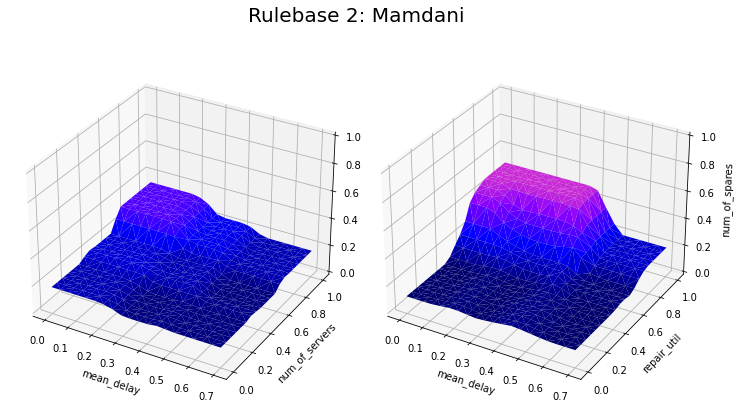

Calculating subplot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated
Calculating subplot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


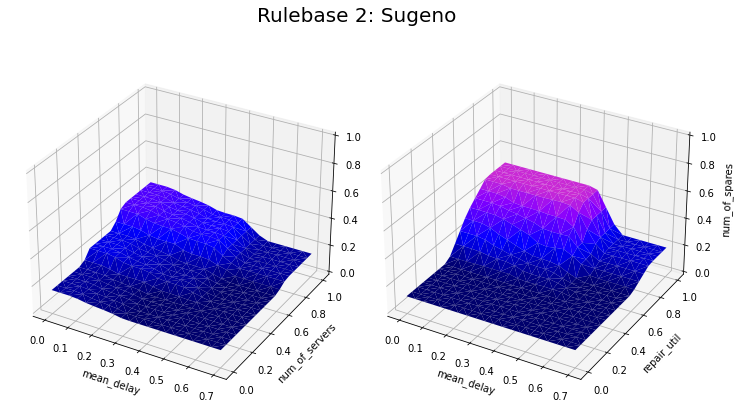

In [14]:
# Plot the response for the rules, surface plot (mamdani)
combined_surface_plot(FS_mamdani_rb2, "Rulebase 2: Mamdani",
                      ["mean_delay", "num_of_servers", "repair_util", "num_of_spares"],
                      domain=[[0, 0.7], [0, 1], [0, 1], [0, 1]], divisions=20)

combined_surface_plot(FS_sugeno_rb2, "Rulebase 2: Sugeno",
                      ["mean_delay", "num_of_servers", "repair_util", "num_of_spares"],
                      domain=[[0, 0.7], [0, 1], [0, 1], [0, 1]], divisions=20, sugeno=True)

## Rulebase 3
The sections for making rulebase 3 and the systems using it. The rulebase were interpreted
from the Cube FAM representation of the rulebase given in the textbook.

In [15]:
# Rule base 3
# Define the rules for db3
# mean_delay: very_short, short, medium
# number_of_servers: small, rather_small, medium, rather_large, large
# utilisation_factor: low, medium, high
# number_of_spares: very_small, small, rather_small, medium, rather_large, large, very_large

R1_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R2_db3 = "IF (mean_delay IS short) AND (num_of_servers IS small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R3_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R4_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS rather_small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R5_db3 = "IF (mean_delay IS short) AND (num_of_servers IS rather_small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R6_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS rather_small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R7_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R8_db3 = "IF (mean_delay IS short) AND (num_of_servers IS medium) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R9_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R10_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS rather_large) AND (repair_util IS low) " \
          "THEN (num_of_spares IS small)"
R11_db3 = "IF (mean_delay IS short) AND (num_of_servers IS rather_large) AND (repair_util IS low) " \
          "THEN (num_of_spares IS small)"
R12_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS rather_large) AND (repair_util IS low) " \
          "THEN (num_of_spares IS very_small)"
R13_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) AND (repair_util IS low) " \
          "THEN (num_of_spares IS small)"
R14_db3 = "IF (mean_delay IS short) AND (num_of_servers IS large) AND (repair_util IS low) " \
          "THEN (num_of_spares IS small)"
R15_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS large) AND (repair_util IS low) " \
          "THEN (num_of_spares IS very_small)"
R16_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R17_db3 = "IF (mean_delay IS short) AND (num_of_servers IS small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R18_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R19_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS rather_small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R20_db3 = "IF (mean_delay IS short) AND (num_of_servers IS rather_small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R21_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS rather_small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R22_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS rather_small)"
R23_db3 = "IF (mean_delay IS short) AND (num_of_servers IS medium) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R24_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R25_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS rather_large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS medium)"
R26_db3 = "IF (mean_delay IS short) AND (num_of_servers IS rather_large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS rather_small)"
R27_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS rather_large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R28_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS medium)"
R29_db3 = "IF (mean_delay IS short) AND (num_of_servers IS large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS rather_small)"
R30_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R31_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS very_large)"
R32_db3 = "IF (mean_delay IS short) AND (num_of_servers IS small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS large)"
R33_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R34_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS rather_small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS very_large)"
R35_db3 = "IF (mean_delay IS short) AND (num_of_servers IS rather_small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_large)"
R36_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS rather_small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_small)"
R37_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R38_db3 = "IF (mean_delay IS short) AND (num_of_servers IS medium) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R39_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) AND (repair_util IS high) " \
          "THEN (num_of_spares IS small)"
R40_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS rather_large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_large)"
R41_db3 = "IF (mean_delay IS short) AND (num_of_servers IS rather_large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R42_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS rather_large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_small)"
R43_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS large)"
R44_db3 = "IF (mean_delay IS short) AND (num_of_servers IS large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R45_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_small)"

rule_base3 = [R1_db3, R2_db3, R3_db3, R4_db3, R5_db3, R6_db3, R7_db3, R8_db3, R9_db3, R10_db3, R11_db3, R12_db3,
              R13_db3, R14_db3, R15_db3, R16_db3, R17_db3, R18_db3, R19_db3, R20_db3, R21_db3, R22_db3, R23_db3,
              R24_db3, R25_db3, R26_db3, R27_db3, R28_db3, R29_db3, R30_db3, R31_db3, R32_db3, R33_db3, R34_db3,
              R35_db3, R36_db3, R37_db3, R38_db3, R39_db3, R40_db3, R41_db3, R42_db3, R43_db3, R44_db3, R45_db3]

## Make the Mamdani and Sugeno systems

In [ ]:
FS_mamdani_rb3 = fs.FuzzySystem(show_banner=False)
FS_sugeno_rb3 = fs.FuzzySystem(show_banner=False)

Rulebase 3 uses a different definition of the linguistic variable for number of servers! The following section generates
this new definition and plots it.

In [ ]:
# Make new linguistic variable for number of servers
num_of_servers_rb3_s1 = fs.FuzzySet(points=[[0.2, 1.], [0.35, 0.]], term="small")
num_of_servers_rb3_s2 = fs.FuzzySet(points=[[0.15, 0.], [0.3, 1.], [0.45, 0.]], term="rather_small")
num_of_servers_rb3_s3 = fs.FuzzySet(points=[[0.3, 0.], [0.5, 1.], [0.7, 0]], term="medium")
num_of_servers_rb3_s4 = fs.FuzzySet(points=[[0.55, 0.], [0.7, 1.], [0.85, 0.]], term="rather_large")
num_of_servers_rb3_s5 = fs.FuzzySet(points=[[0.6, 0.], [0.8, 1.]], term="large")
num_of_servers_rb3 = fs.LinguisticVariable([num_of_servers_rb3_s1, num_of_servers_rb3_s2, num_of_servers_rb3_s3,
                                            num_of_servers_rb3_s4, num_of_servers_rb3_s5],
                                           universe_of_discourse=[0, 1], concept="Number of servers")
# Plot the new linguistic variable
num_of_servers_rb3.plot()


In [ ]:
# Add the linguistic variables to the system
FS_mamdani_rb3.add_linguistic_variable("mean_delay", mean_delay)
FS_mamdani_rb3.add_linguistic_variable("num_of_servers", num_of_servers_rb3)
FS_mamdani_rb3.add_linguistic_variable("repair_util", repair_util)
FS_mamdani_rb3.add_linguistic_variable("num_of_spares", num_of_spares)

FS_sugeno_rb3.add_linguistic_variable("mean_delay", mean_delay)
FS_sugeno_rb3.add_linguistic_variable("num_of_servers", num_of_servers_rb3)
FS_sugeno_rb3.add_linguistic_variable("repair_util", repair_util)

# Define output crisp values for the sugeno system
FS_sugeno_rb3.set_crisp_output_value("very_small", 13/120)
FS_sugeno_rb3.set_crisp_output_value("small", 0.2)
FS_sugeno_rb3.set_crisp_output_value("rather_small", 0.35)
FS_sugeno_rb3.set_crisp_output_value("medium", 0.5)
FS_sugeno_rb3.set_crisp_output_value("rather_large", 0.65)
FS_sugeno_rb3.set_crisp_output_value("large", 0.8)
FS_sugeno_rb3.set_crisp_output_value("very_large", 107/120)

# Add the rules to the systems
FS_mamdani_rb3.add_rules(rule_base3)
FS_sugeno_rb3.add_rules(rule_base3)

### Make the surface plots for the systems

Calculating subplot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated
Calculating subplot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


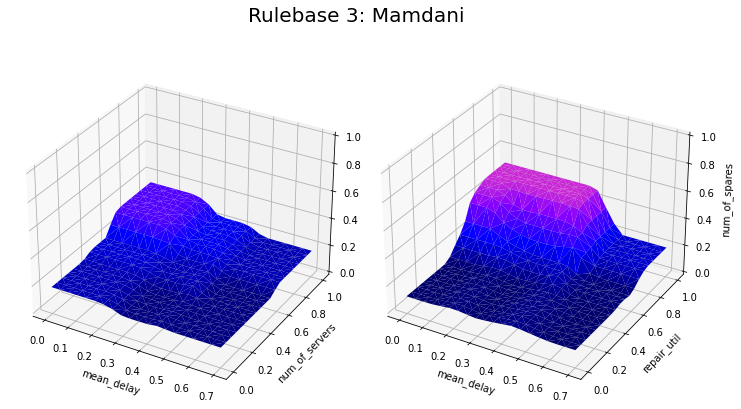

Calculating subplot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated
Calculating subplot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


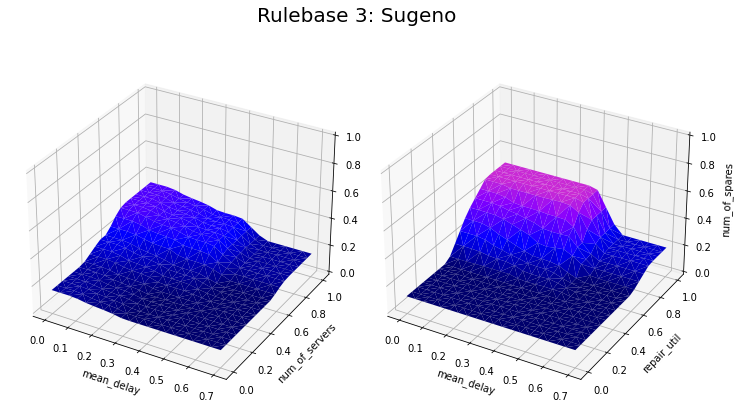

In [17]:
combined_surface_plot(FS_mamdani_rb3, "Rulebase 3: Mamdani",
                      ["mean_delay", "num_of_servers", "repair_util", "num_of_spares"],
                      domain=[[0, 0.7], [0, 1], [0, 1], [0, 1]], divisions=20)

combined_surface_plot(FS_sugeno_rb3, "Rulebase 3: Sugeno",
                      ["mean_delay", "num_of_servers", "repair_util", "num_of_spares"],
                      domain=[[0, 0.7], [0, 1], [0, 1], [0, 1]], divisions=20, sugeno=True)


## Comparison of all the different systems

In [40]:
# Make the test variables
mean_delay_test = 0.5
num_of_servers_test = 0.6
repair_util_test = 0.7

# Run inference on all the systems with thees test variables
systems = [FS, FS_sugeno_rb1, FS_mamdani_rb2, FS_sugeno_rb2, FS_mamdani_rb3, FS_sugeno_rb3]
results = []
for i in np.arange(len(systems)):
    systems[i].set_variable("mean_delay", mean_delay_test)
    systems[i].set_variable("num_of_servers", num_of_servers_test)
    systems[i].set_variable("repair_util", repair_util_test)
    if i % 2:
        results.append(systems[i].Sugeno_inference(["num_of_spares"])["num_of_spares"])
    else:
        results.append(systems[i].Mamdani_inference(["num_of_spares"])["num_of_spares"])

# Print the results:
print("Rulebase 1: MAMDANI  = ", results[0])
print("Rulebase 1: SUGENO   = ", results[1])
print("Rulebase 2: MAMDANI  = ", results[2])
print("Rulebase 2: SUGENO   = ", results[3])
print("Rulebase 3: MAMDANI  = ", results[4])
print("Rulebase 3: SUGENO   = ", results[5])


Rulebase 1: MAMDANI  =  0.4999999999999999
Rulebase 1: SUGENO   =  0.49999999999999994
Rulebase 2: MAMDANI  =  0.17593880329729383
Rulebase 2: SUGENO   =  0.15416666666666665
Rulebase 3: MAMDANI  =  0.2009186185081446
Rulebase 3: SUGENO   =  0.20249999999999999


In [ ]:
# Only needed when not using jupyter notebook, this pauses the program so the user can see the plots generated.
plt.show(block=True)